# KNN for images ----> by **Ido Fuchs** & **Shiraz Toledano**

#### Imports

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Spliting the data

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Unpack the digits dataset
digits = datasets.load_digits()
X = digits['data']
y = digits['target']

In [32]:
print(digits.keys())
# digits_df = pd.DataFrame(digits.data)
# digits_df.head()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [33]:
digits['data'].shape

(1797, 64)

In [34]:
digits['target'].shape

(1797,)

In [35]:
digits_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_df['target'] = digits['target']
digits_df.head(15)


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [36]:
# Preprocess data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Building the algorithm

In [38]:
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

In [39]:
def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [40]:
class KNeighborsClassifier_IdoShiraz():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

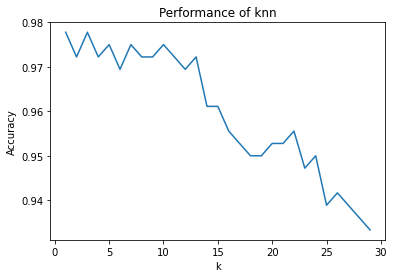

In [41]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier_IdoShiraz(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [42]:
# calculate the score
knn = KNeighborsClassifier_IdoShiraz(k=5)
knn.fit(X_train, y_train)
score = knn.evaluate(X_test, y_test)
print(score)

0.975


In [43]:
knn_dict = {'model': knn, 'scaler': scaler, 'score': score}

#### Applying K-FOLD

In [44]:
# making a k fold cross validation with a for loop

def k_fold_cross_validation(X, y, k, model, metric):
    '''
    X: data
    y: target
    k: number of folds
    model: model to use
    metric: distance metric to use
    '''
    # Split data into k folds
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    # Initialize variables
    accuracies = []
    ks = range(1, 30)
    for k in ks:
        # Initialize variables
        accuracies = []
        for i in range(k):
            # Get the test fold
            X_test = X_folds[i]
            y_test = y_folds[i]
            # Get the training folds
            X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            # Fit the model
            model.fit(X_train, y_train)
            # Evaluate the model
            accuracy = model.evaluate(X_test, y_test)
            accuracies.append(accuracy)
        # Get the average accuracy
        accuracy = sum(accuracies) / len(accuracies)
        print("k = {}: {}".format(k, accuracy))
        return accuracy

k_fold_cross_validation(X, y, k=5, model=knn, metric=euclidean)


# list_of_scores = []
# for i in range(1, 11):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#     knn = KNeighborsClassifier_IdoShiraz(k=3)
#     knn.fit(X_train, y_train)

#     accuracy = knn.evaluate(X_test, y_test)

#     list_of_scores.append(accuracy)
#     print(f"Accuracy for k={i} is {accuracy}")

# print()
# print("Accuracy Avarage: ",sum(list_of_scores)/len(list_of_scores))



k = 1: 0.9333333333333333


0.9333333333333333

In [45]:
# # saving to mongodb
# import pymongo 
# import pickle

# def save_model_to_mongodb(model, scaler, client, db_name, db_connection, model_name):
#     # pickling the model
#     pickled_model = pickle.dump(model)
#     pickled_scaler = pickle.dumps(scaler)
#     # creating connection to mongodb
#     myclient = pymongo.MongoClient(client)
#     # creating database in mongodb
#     mydb = myclient[db_name]
#     # creating collection in mongodb
#     mycol = mydb[db_connection]
#     # inserting the model to mongodb
#     info = mycol.insert_one({"model": pickled_model, "scaler": pickled_scaler, "model_name": model_name})
#     print(info.inserted_id, str(model_name) + "saved succsesfully to mongodb :)")
    
#     details = {
#         "inserted_id": info.inserted_id,
#         "model_name": model_name
#     }
#     return details

In [53]:
def save_model_to_db(dict, client, db, dbconnection, model_name):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(dict["model"])
    pickled_scaler = pickle.dumps(dict["scaler"])
    dict["model"]=pickled_model
    dict["scaler"]=pickled_scaler
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({model_name: pickled_model, 'name': model_name, 'created_time':time.time(),"score":dict["score"],"scaler":pickled_scaler})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details

In [54]:
save_model_to_db(knn_dict, 'mongodb://localhost:27017', "image_prediction", "KNN_by_IdoShiraz", "try1")

630a7d40c86487dc6cdf19e1  saved with this id successfully!


{'inserted_id': ObjectId('630a7d40c86487dc6cdf19e1'),
 'model_name': 'try1',
 'created_time': 1661631808.300645}